In [86]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import torch
from src import *

In [87]:
STEP_SIZE = 0.01
FIG_SIZE = (5,5)
CMAP = 'inferno'
ALPHA = 1
SHADING = 'nearest'
MARKER_T = 'x'
MARKER_C = 'r'

In [88]:
a = torch.arange(-5,5+STEP_SIZE,STEP_SIZE, dtype=t.float32)
b = torch.arange(-5,5+STEP_SIZE,STEP_SIZE, dtype=t.float32)
grid = torch.stack(torch.meshgrid(a, b), -1)
flat_grid = torch.reshape(grid, (-1,2))
agrid, bgrid = np.meshgrid(a.numpy(), b.numpy())

In [89]:
create_fn = [
	create_f01,
	create_f02,
	create_f03,
	create_f04,
	create_f05,
	create_f06,
	create_f07,
	create_f08,
	create_f09,
	create_f10,
	create_f11,
	create_f12,
	create_f13,
	create_f14,
	create_f15,
	create_f16,
	create_f17,
	create_f18,
	create_f19,
	create_f20,
	create_f21,
	create_f22,
	create_f23,
	create_f24,
]

name_fn = [
	'f01',
	'f02',
	'f03',
	'f04',
	'f05',
	'f06',
	'f07',
	'f08',
	'f09',
	'f10',
	'f11',
	'f12',
	'f13',
	'f14',
	'f15',
	'f16',
	'f17',
	'f18',
	'f19',
	'f20',
	'f21',
	'f22',
	'f23',
	'f24',
]

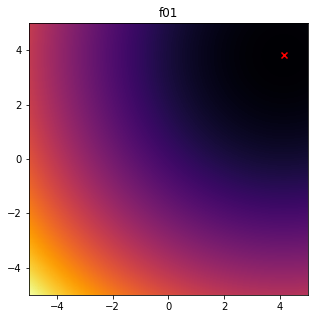

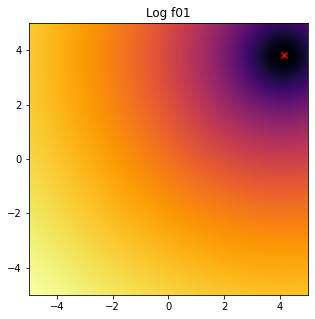

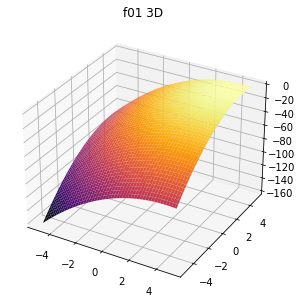

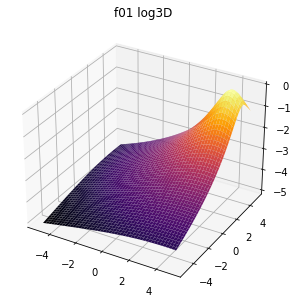

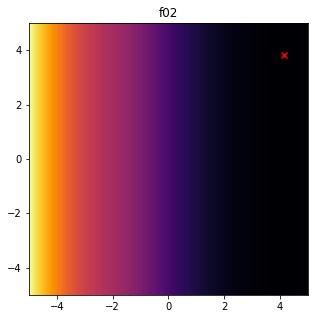

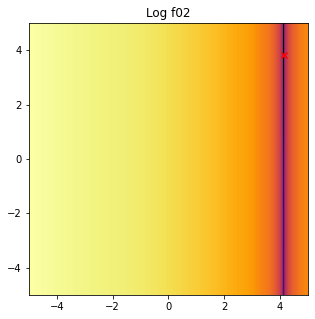

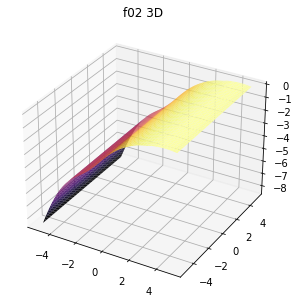

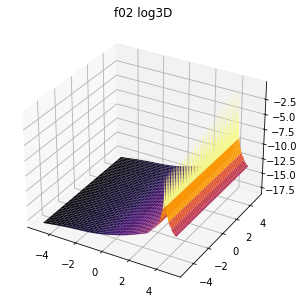

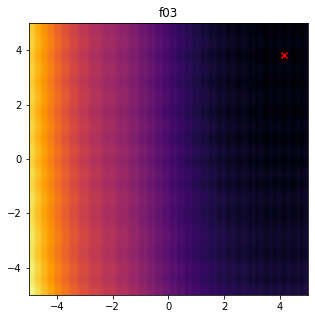

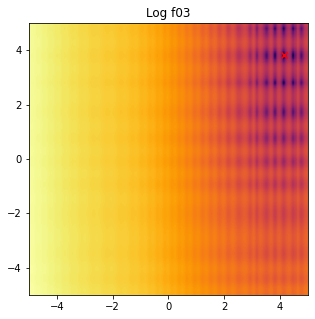

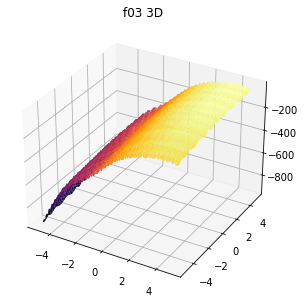

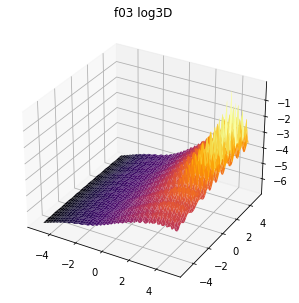

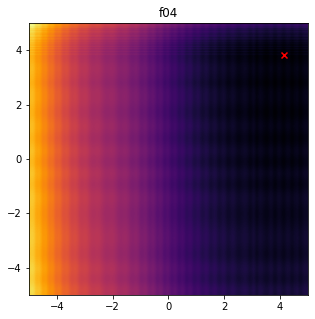

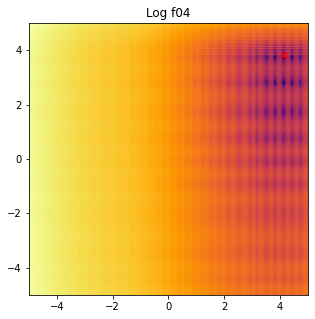

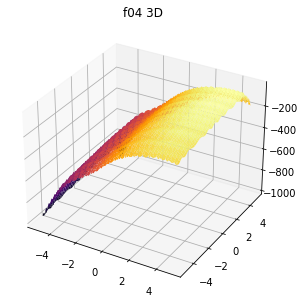

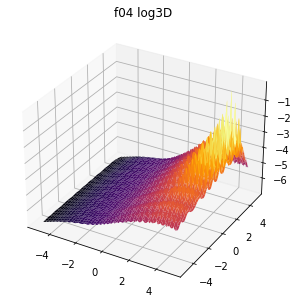

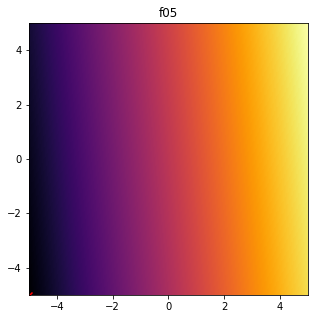

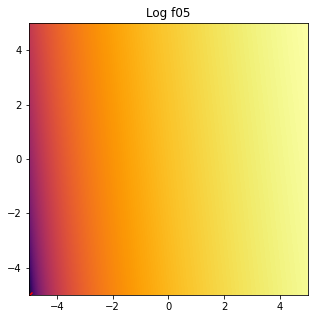

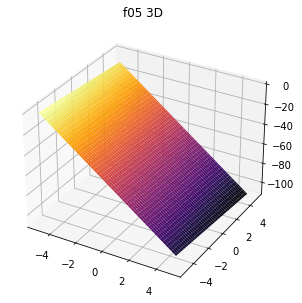

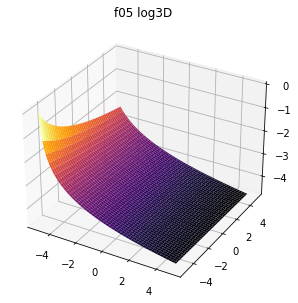

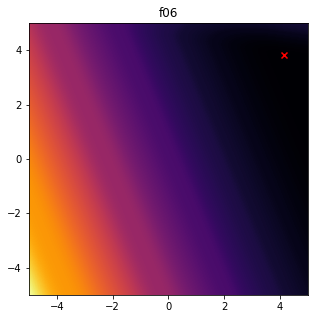

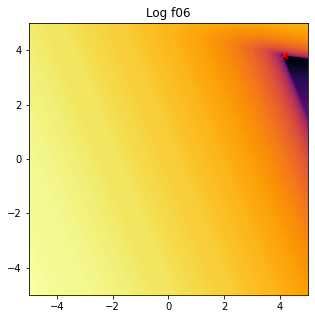

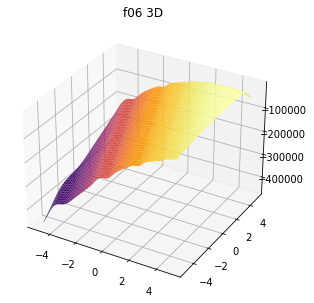

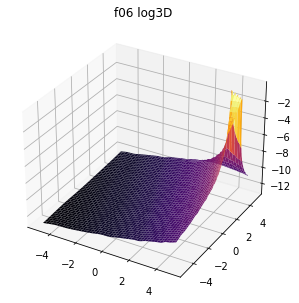

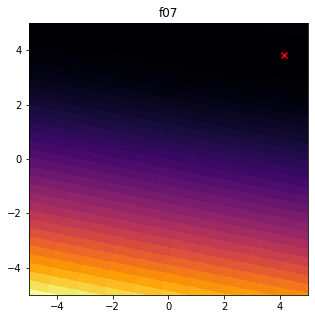

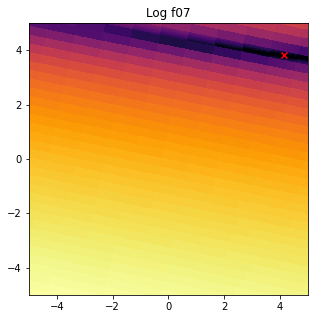

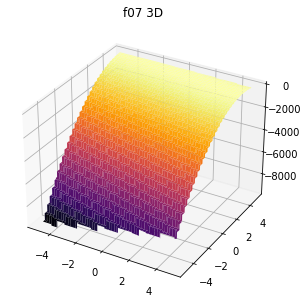

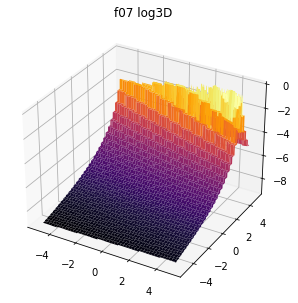

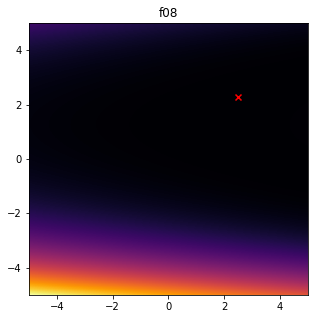

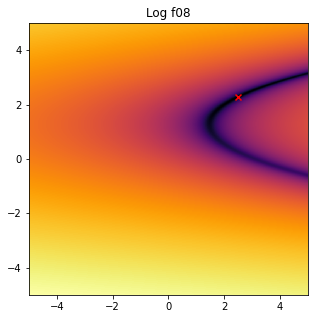

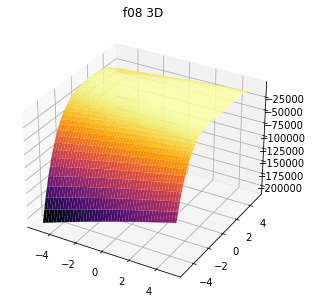

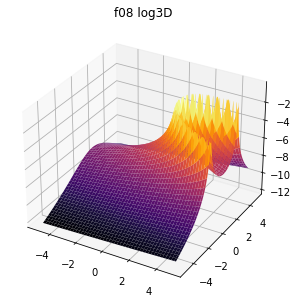

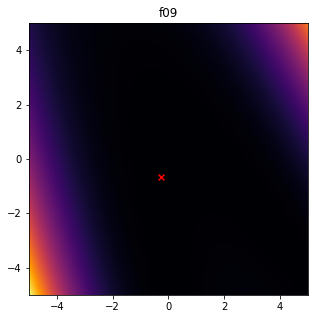

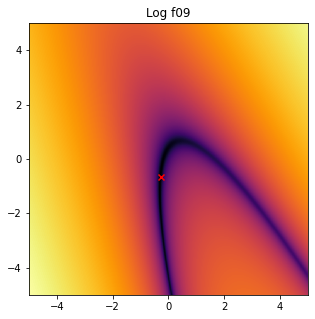

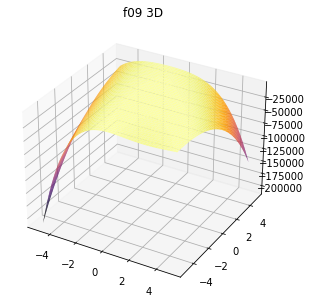

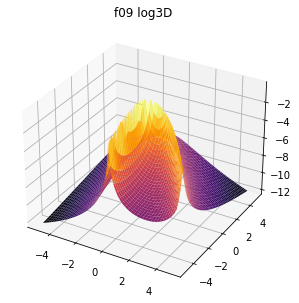

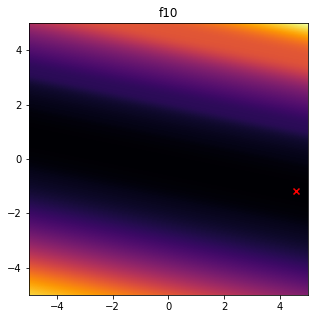

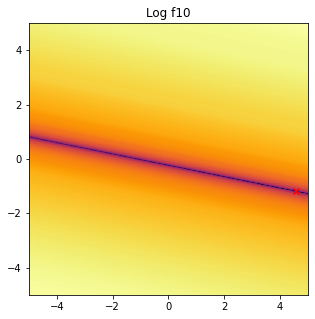

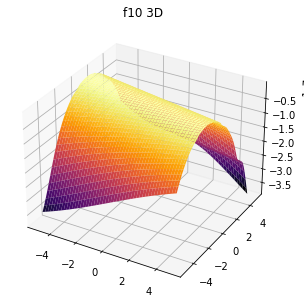

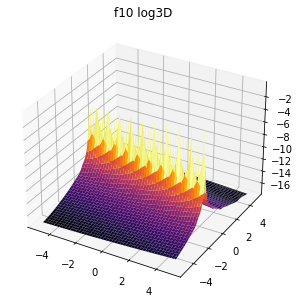

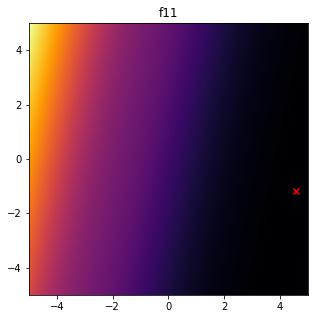

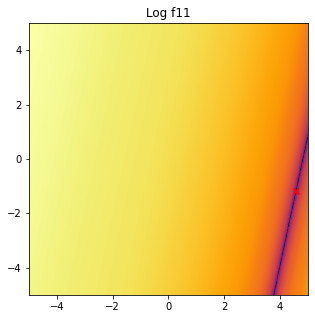

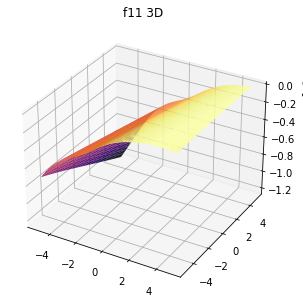

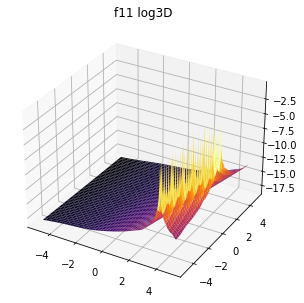

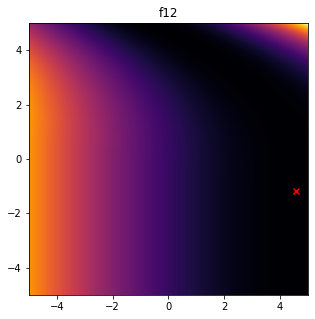

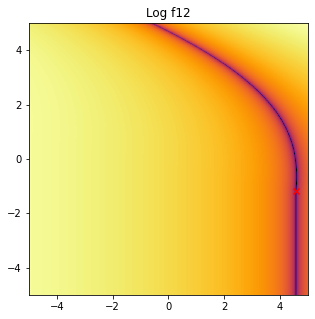

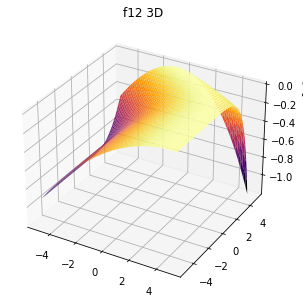

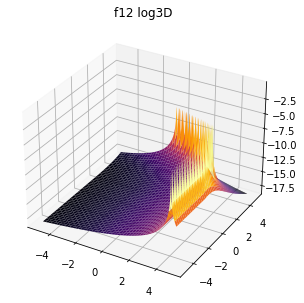

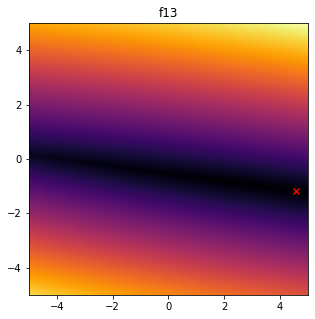

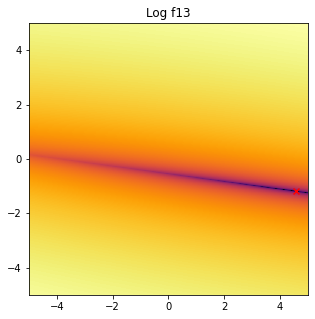

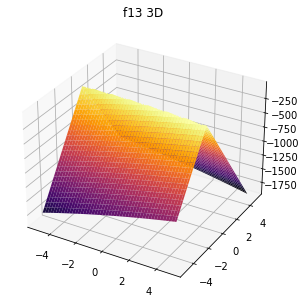

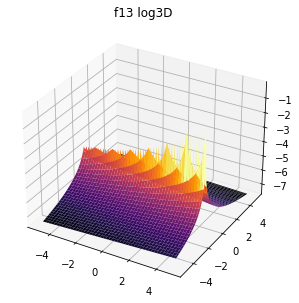

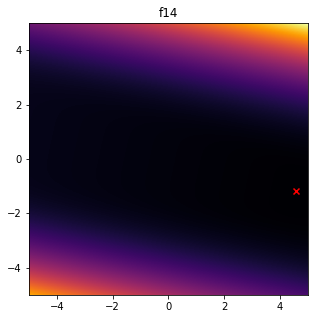

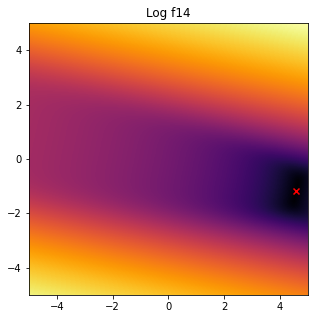

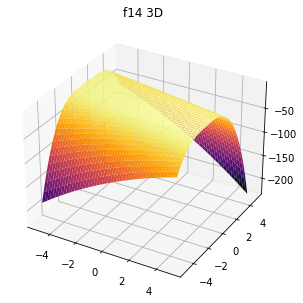

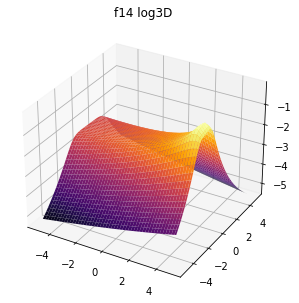

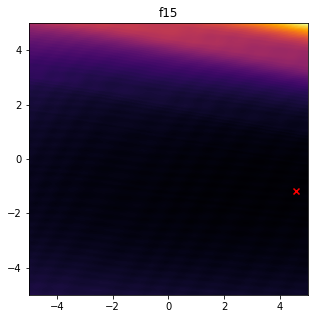

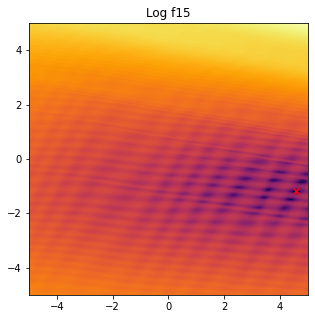

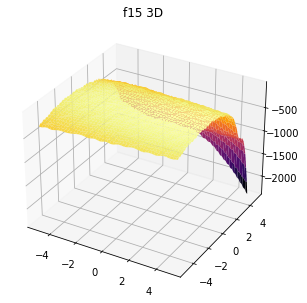

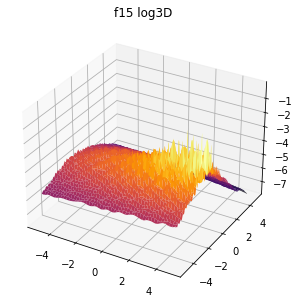

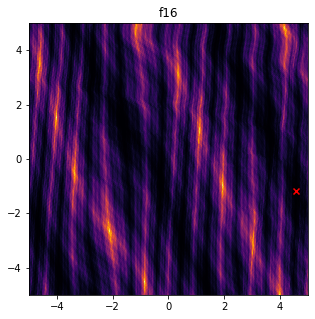

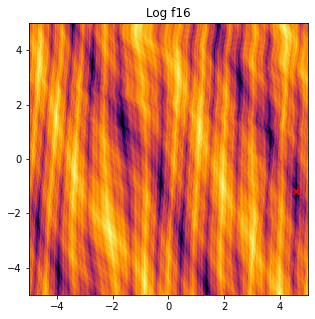

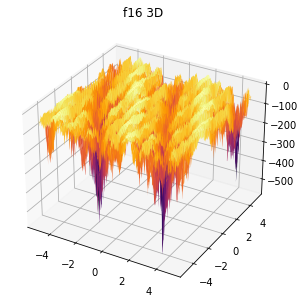

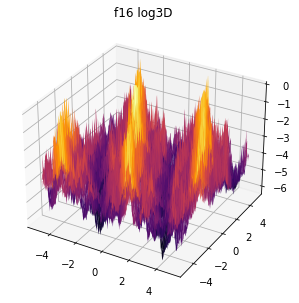

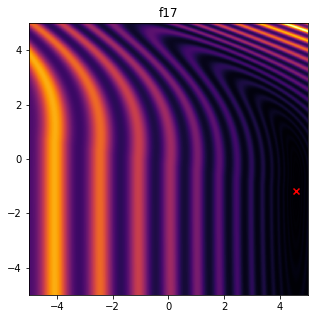

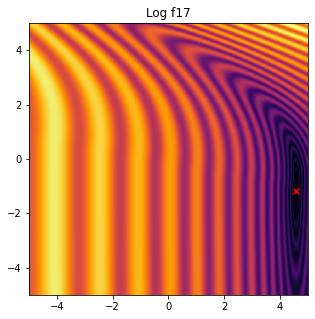

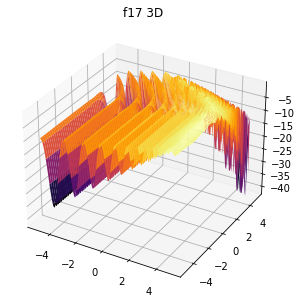

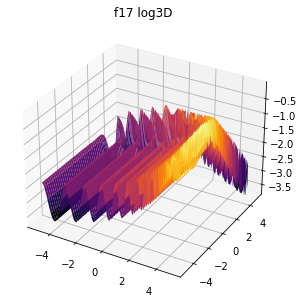

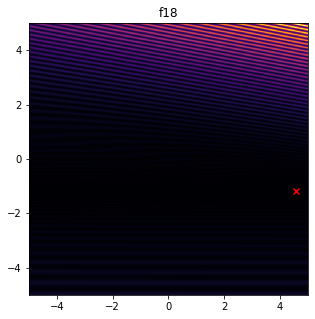

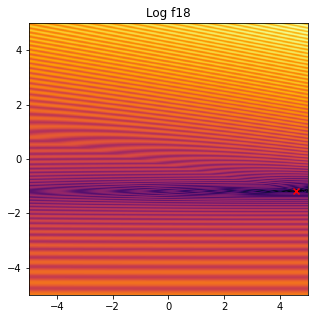

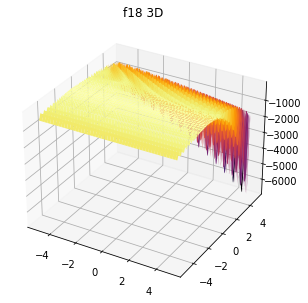

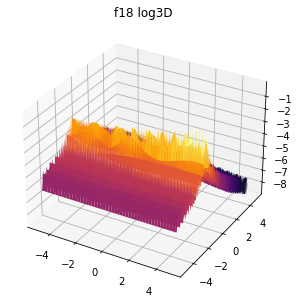

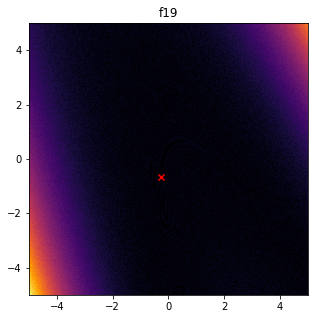

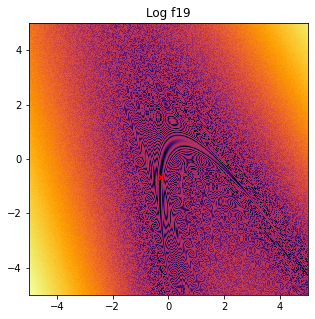

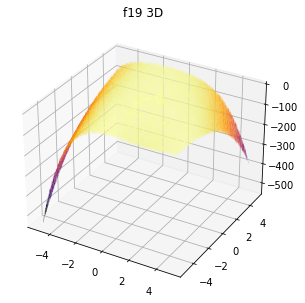

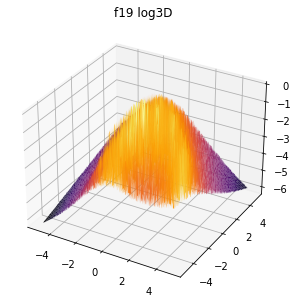

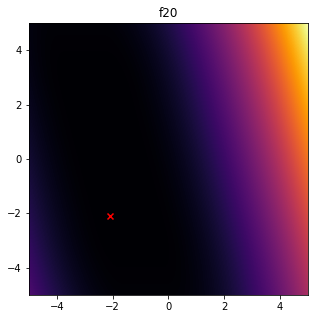

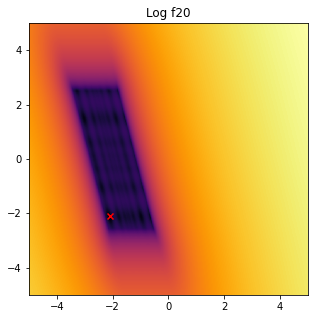

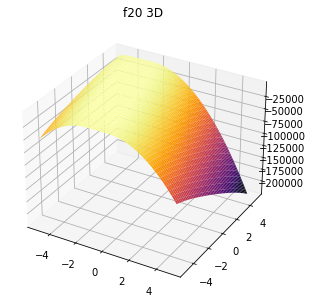

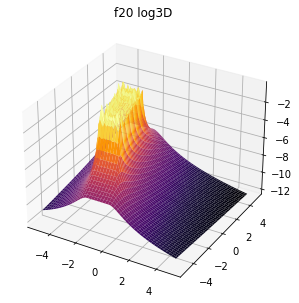

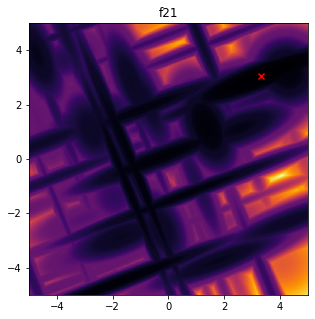

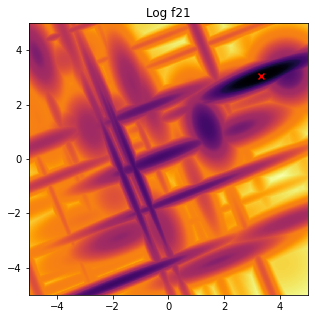

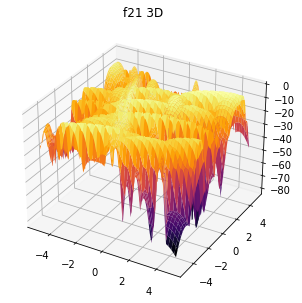

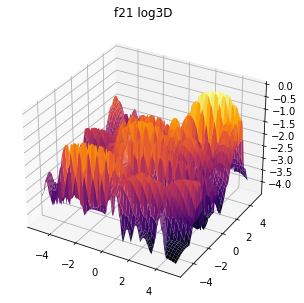

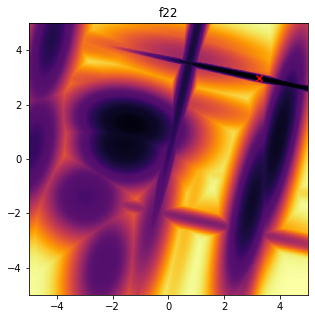

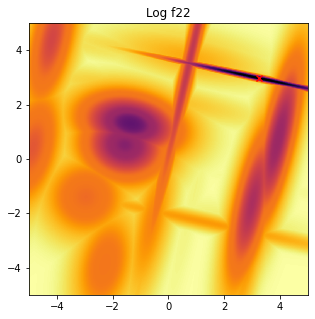

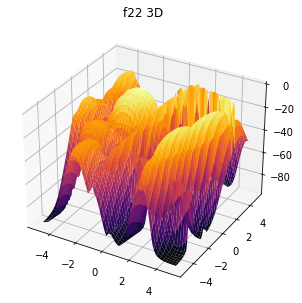

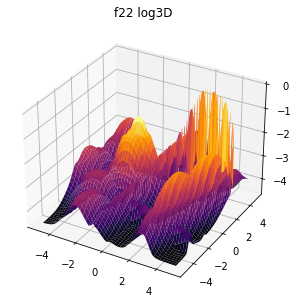

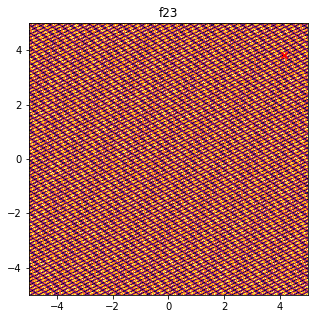

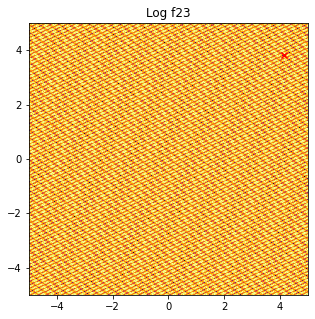

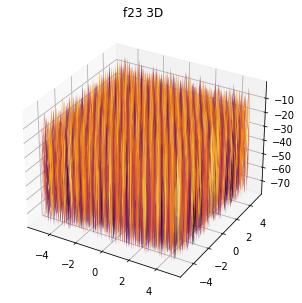

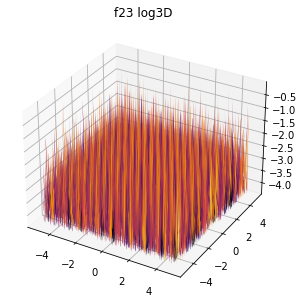

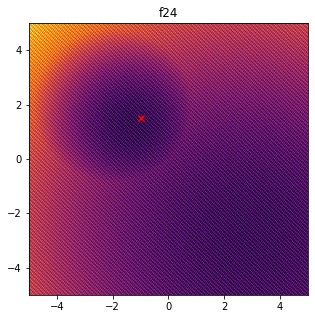

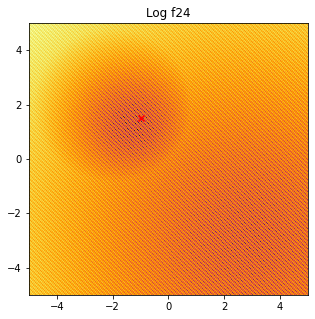

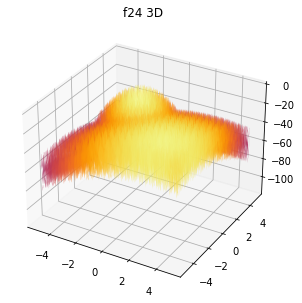

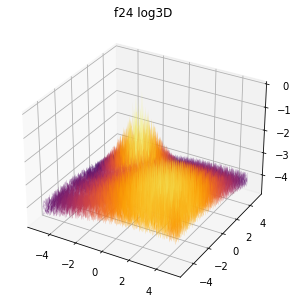

In [90]:
for cr, name in zip(create_fn, name_fn):
	fn = cr(2, seed=42)
	results = torch.reshape(fn(flat_grid), grid.shape[:-1]) - fn.f_opt

	plt.figure(figsize=FIG_SIZE)
	plt.pcolormesh(a, b, results, cmap=CMAP, alpha=ALPHA, shading=SHADING)
	plt.scatter(*fn.x_opt.tolist()[::-1], marker=MARKER_T, c=MARKER_C)
	plt.title(name)
	plt.show()

	plt.figure(figsize=FIG_SIZE)
	tmpresults = results - results.min() + 1
	plt.pcolormesh(a, b, tmpresults, cmap=CMAP, alpha=ALPHA, shading=SHADING, norm=colors.LogNorm(tmpresults.min(), tmpresults.max()))
	plt.scatter(*fn.x_opt.tolist()[::-1], marker=MARKER_T, c=MARKER_C)
	plt.title("Log " + name)
	plt.show()

	fig = plt.figure(figsize=FIG_SIZE)
	ax = fig.add_subplot(111, projection='3d')
	ax.plot_surface(
		agrid, bgrid, -results.cpu().numpy(),
		cmap=CMAP,
		alpha=ALPHA,
	)
	plt.title(name + " 3D")
	plt.show()

	fig = plt.figure(figsize=FIG_SIZE)
	ax = fig.add_subplot(111, projection='3d')
	ax.plot_surface(
		agrid, bgrid, -t.log_(results+1).cpu().numpy(),
		cmap=CMAP,
		alpha=ALPHA,
	)
	plt.title(name + " log3D")
	plt.show()